# Flights Capstone Two: EDA

## By Morgan Snellgrove

We are interested in predicting ticket price using most of the other features in the dataset. Right now, price is given in two columns: 'price' and 'price_usd'. Since the values in US dollars will be more meaningful, I will use the column 'price_usd' as the target feature. 

Before starting, I suspect the following features will be useful explanatory variables: 'date', 'airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', and 'days_left'. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
flights = pd.read_csv('final_clean_flight_dataset.csv', parse_dates = ['date'])

In [3]:
flights.head()

,Unnamed: 0,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price
0,0,2022-02-11,SpiceJet,SG-8709,Delhi,18:55:00,0,21:05:00,Mumbai,economy,2.17,2,10,1,5953
1,1,2022-02-11,SpiceJet,SG-8157,Delhi,06:20:00,0,08:40:00,Mumbai,economy,2.33,2,20,1,5953
2,2,2022-02-11,AirAsia,I5-764,Delhi,04:25:00,0,06:35:00,Mumbai,economy,2.17,2,10,1,5956
3,3,2022-02-11,Vistara,UK-995,Delhi,10:20:00,0,12:35:00,Mumbai,economy,2.25,2,15,1,5955
4,4,2022-02-11,Vistara,UK-963,Delhi,08:50:00,0,11:10:00,Mumbai,economy,2.33,2,20,1,5955


In [4]:
flights.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
flights.head()

,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price
0,2022-02-11,SpiceJet,SG-8709,Delhi,18:55:00,0,21:05:00,Mumbai,economy,2.17,2,10,1,5953
1,2022-02-11,SpiceJet,SG-8157,Delhi,06:20:00,0,08:40:00,Mumbai,economy,2.33,2,20,1,5953
2,2022-02-11,AirAsia,I5-764,Delhi,04:25:00,0,06:35:00,Mumbai,economy,2.17,2,10,1,5956
3,2022-02-11,Vistara,UK-995,Delhi,10:20:00,0,12:35:00,Mumbai,economy,2.25,2,15,1,5955
4,2022-02-11,Vistara,UK-963,Delhi,08:50:00,0,11:10:00,Mumbai,economy,2.33,2,20,1,5955


In [6]:
flights['price_usd'] = round(flights['price'] * 0.0122284, 2)

In [7]:
flights.head()

,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price,price_usd
0,2022-02-11,SpiceJet,SG-8709,Delhi,18:55:00,0,21:05:00,Mumbai,economy,2.17,2,10,1,5953,72.80
1,2022-02-11,SpiceJet,SG-8157,Delhi,06:20:00,0,08:40:00,Mumbai,economy,2.33,2,20,1,5953,72.80
2,2022-02-11,AirAsia,I5-764,Delhi,04:25:00,0,06:35:00,Mumbai,economy,2.17,2,10,1,5956,72.83
3,2022-02-11,Vistara,UK-995,Delhi,10:20:00,0,12:35:00,Mumbai,economy,2.25,2,15,1,5955,72.82
4,2022-02-11,Vistara,UK-963,Delhi,08:50:00,0,11:10:00,Mumbai,economy,2.33,2,20,1,5955,72.82


In [10]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              300261 non-null  datetime64[ns]
 1   airline           300261 non-null  object        
 2   flight            300261 non-null  object        
 3   source_city       300261 non-null  object        
 4   departure_time    300261 non-null  object        
 5   stops             300261 non-null  int64         
 6   arrival_time      300261 non-null  object        
 7   destination_city  300261 non-null  object        
 8   class             300261 non-null  object        
 9   duration          300261 non-null  float64       
 10  duration_hours    300261 non-null  int64         
 11  duration_minutes  300261 non-null  int64         
 12  days_left         300261 non-null  int64         
 13  price             300261 non-null  int64         
 14  pric

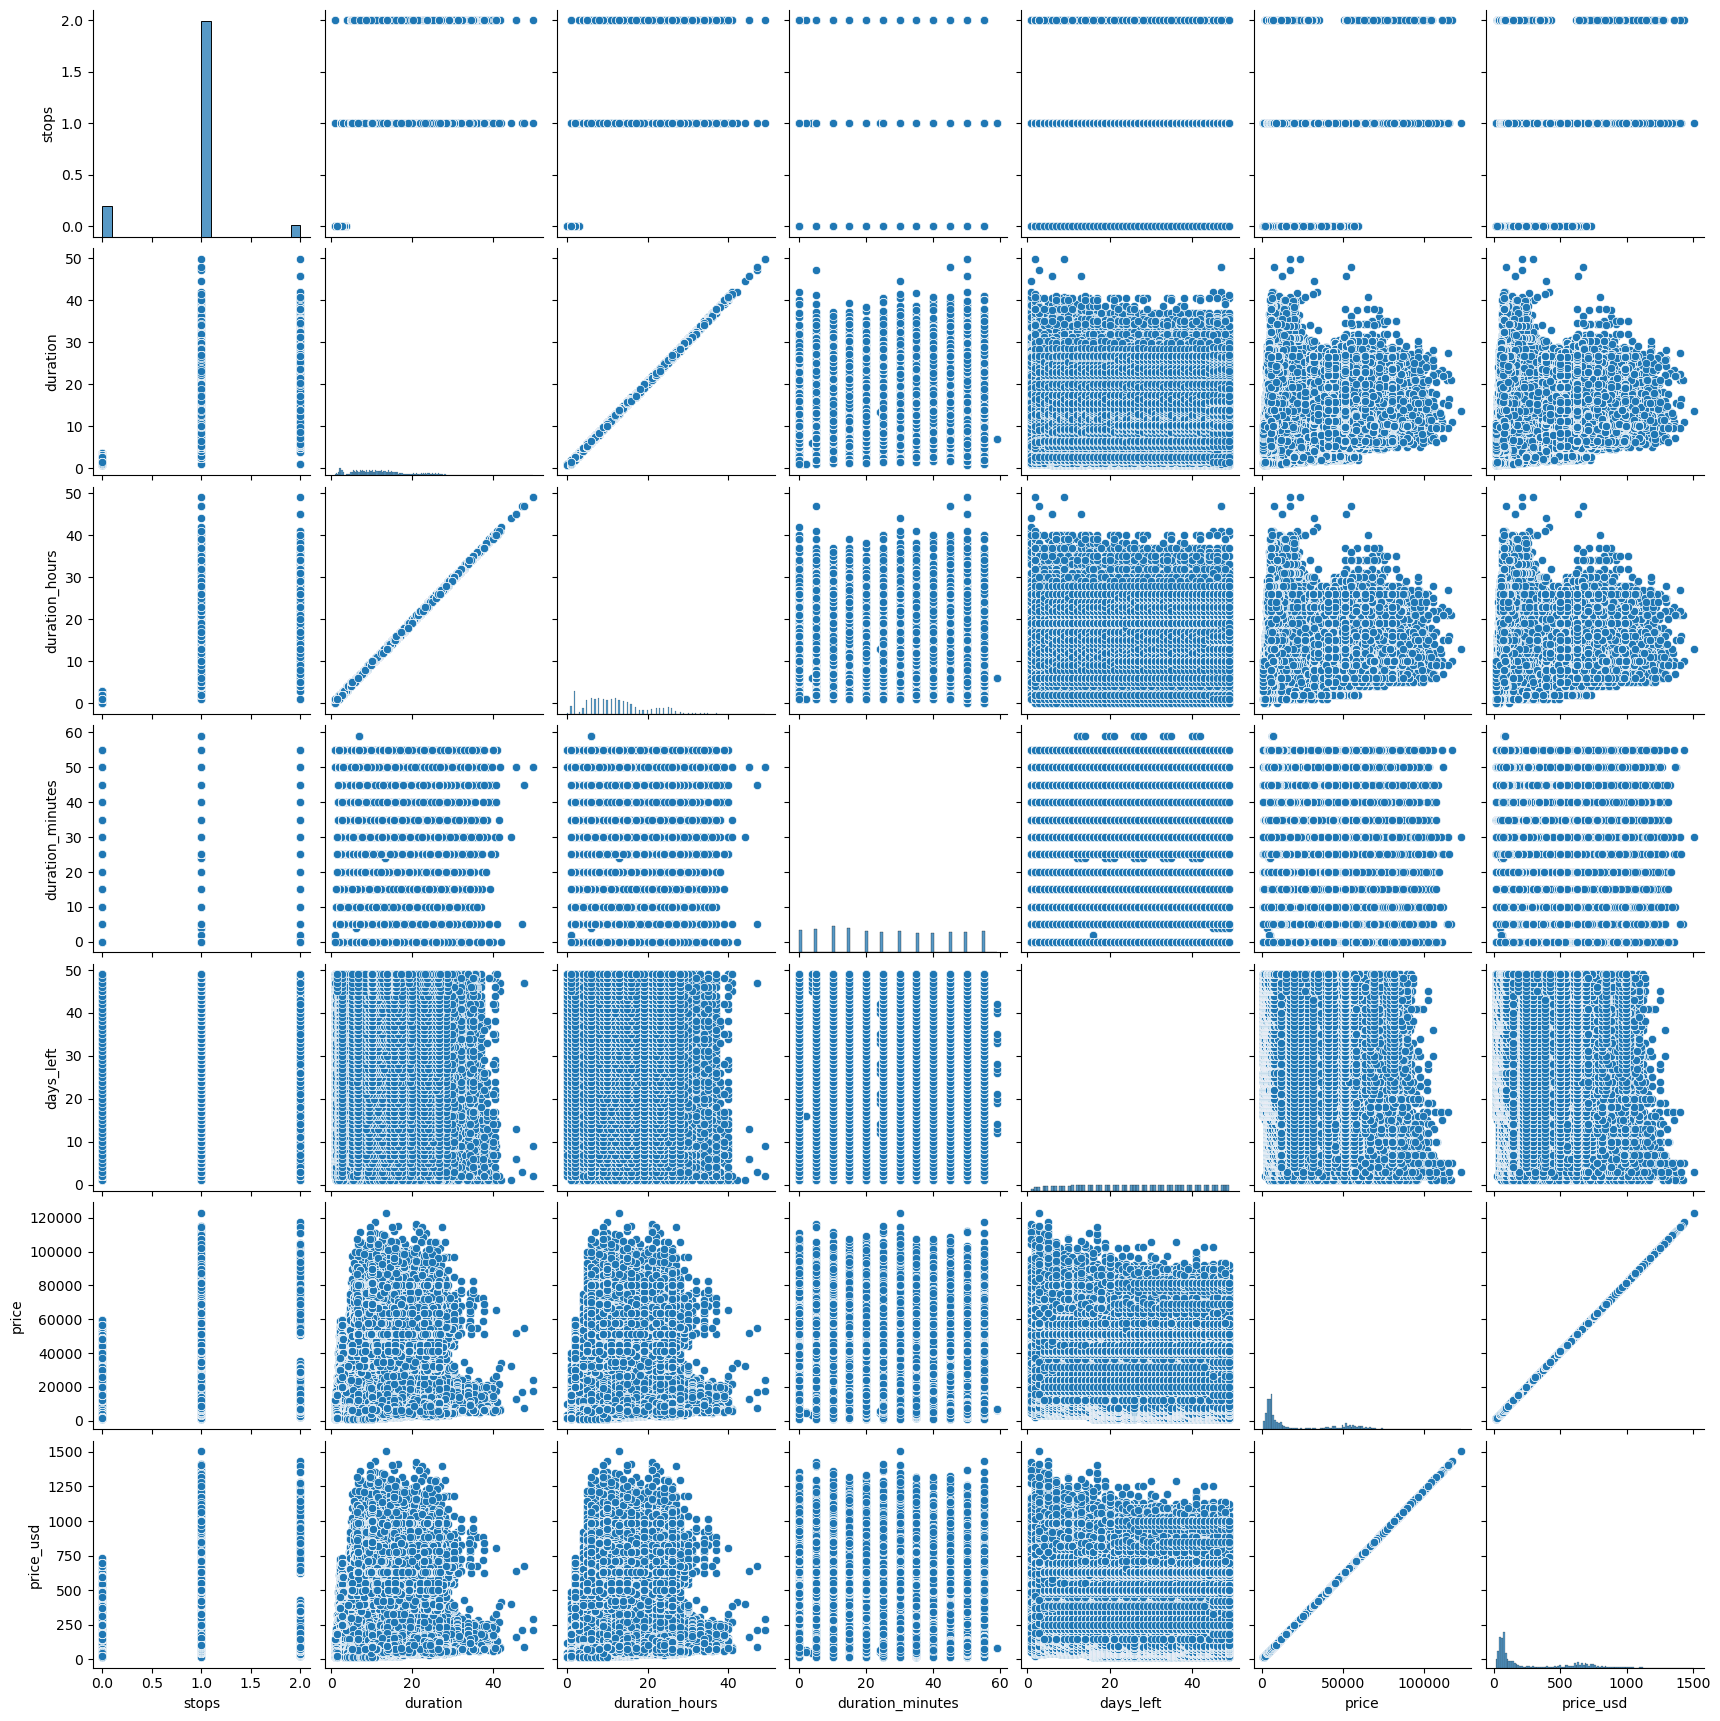

In [16]:
sns.pairplot(flights)

None of the scatterplots look useful... We have a lot of discrete variables. The pair plots involving continuous variables do not show much correlation at all. 

Observations:

'stops': Most flights had 1 stop. Looking at 'stops' with our target variable, 


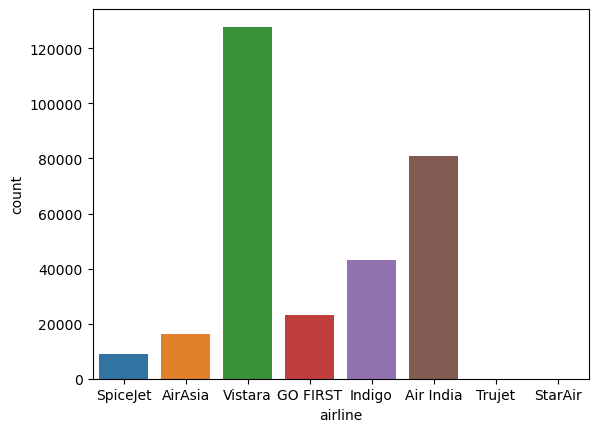

In [20]:
_= sns.countplot(x = 'airline', data = flights)

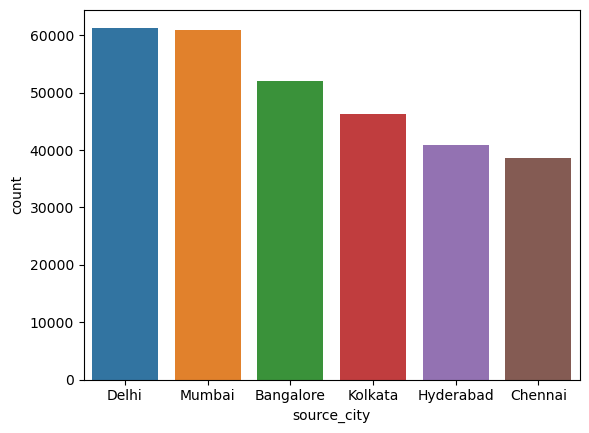

In [21]:
_= sns.countplot(x = 'source_city', data = flights)

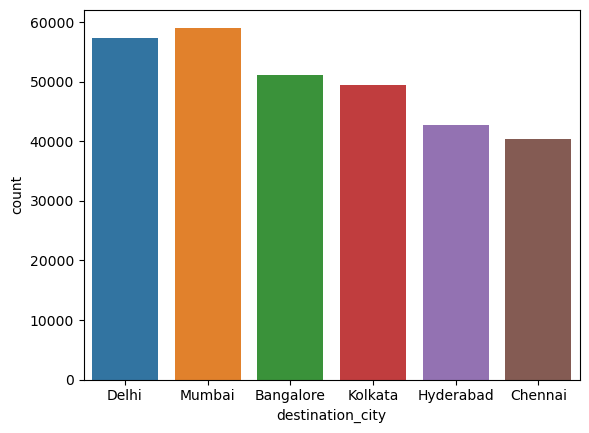

In [23]:
_= sns.countplot(x = 'destination_city', data = flights, order = ['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'])

In [26]:
from_to_flights = pd.DataFrame(zip(flights['source_city'], flights['destination_city']))

In [27]:
from_to_flights.head()

,0,1
0,Delhi,Mumbai
1,Delhi,Mumbai
2,Delhi,Mumbai
3,Delhi,Mumbai
4,Delhi,Mumbai


In [28]:
from_to_flights['from_to'] = from_to_flights[0]+ ', ' + from_to_flights[1] 

In [29]:
from_to_flights.head()

,0,1,from_to
0,Delhi,Mumbai,"Delhi, Mumbai"
1,Delhi,Mumbai,"Delhi, Mumbai"
2,Delhi,Mumbai,"Delhi, Mumbai"
3,Delhi,Mumbai,"Delhi, Mumbai"
4,Delhi,Mumbai,"Delhi, Mumbai"


In [32]:
from_to_flights.value_counts('from_to')

from_to
Delhi, Mumbai           15291
Mumbai, Delhi           14809
Delhi, Bangalore        14012
Bangalore, Delhi        13756
Bangalore, Mumbai       12940
Mumbai, Bangalore       12885
Mumbai, Kolkata         12602
Delhi, Kolkata          11934
Kolkata, Mumbai         11467
Delhi, Chennai          10780
Kolkata, Delhi          10506
Mumbai, Hyderabad       10477
Mumbai, Chennai         10130
Hyderabad, Mumbai       10073
Bangalore, Kolkata      10029
Kolkata, Bangalore       9824
Chennai, Delhi           9783
Chennai, Mumbai          9338
Delhi, Hyderabad         9328
Bangalore, Hyderabad     8971
Hyderabad, Delhi         8507
Hyderabad, Kolkata       7987
Hyderabad, Bangalore     7898
Kolkata, Hyderabad       7897
Chennai, Kolkata         6983
Kolkata, Chennai         6653
Chennai, Bangalore       6493
Bangalore, Chennai       6410
Hyderabad, Chennai       6395
Chennai, Hyderabad       6103
dtype: int64

In [33]:
from_to_flights['price_usd'] = flights['price_usd']

In [34]:
from_to_flights.head()

,0,1,from_to,price_usd
0,Delhi,Mumbai,"Delhi, Mumbai",72.80
1,Delhi,Mumbai,"Delhi, Mumbai",72.80
2,Delhi,Mumbai,"Delhi, Mumbai",72.83
3,Delhi,Mumbai,"Delhi, Mumbai",72.82
4,Delhi,Mumbai,"Delhi, Mumbai",72.82


In [40]:
from_to_flights.groupby('from_to').mean().sort_values(by = 'price_usd', ascending = False)

,price_usd
from_to,
"Chennai, Bangalore",306.710973
"Kolkata, Chennai",289.328171
"Bangalore, Kolkata",287.346504
"Bangalore, Chennai",285.188590
"Mumbai, Bangalore",283.060685
"Bangalore, Mumbai",282.809415
"Mumbai, Chennai",278.585976
"Chennai, Mumbai",278.389900
"Kolkata, Bangalore",278.132251
